In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
filename = "case_data.csv"
filepath = f"data/{filename}"

data = pd.read_csv(filepath)
df = data[:60]
df = df.dropna(subset=['R.4', 'A.4', 'S.4'])

In [62]:
len(df)

47

In [63]:
df.head()

,Case Number,Scan Type,Age,Gender,BMI,Image Size,Left Kidney,LR1,LR2,PA1,...,A.2,S.2,Most Anterior Point on Iliac Crest (Right),R.3,A.3,S.3,Xyphoid Process,R.4,A.4,S.4
0,case_00000,arterial,49,male,29.47,NaN,NaN,-104.98,-26.81,-109.71,...,8.642,-112.065,NaN,132.939,23.984,-116.837,NaN,-2.211,53.167,152.500
1,case_00001,late,50,male,33.71,NaN,NaN,-140.32,-54.13,-54.16,...,8.642,-131.844,NaN,132.939,16.920,-129.552,NaN,5.686,126.479,131.952
2,case_00002,late,74,male,28.13,512x512x261,NaN,-100.76,-14.57,-141.75,...,-43.905,-43.905,NaN,132.939,-38.321,-81.048,NaN,0.127,120.438,183.137
3,case_00003,arterial,44,female,38.69,NaN,NaN,-107.37,-32.23,-92.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.406,60.701,125.215
4,case_00004,arterial,73,male,28.59,512x512x64,NaN,-132.58,-43.43,-82.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.406,147.535,115.411


In [64]:
df.rename(columns={'Age ': 'Age'}, inplace=True)
df.columns

Index(['Case Number', 'Scan Type', 'Age', 'Gender', 'BMI', 'Image Size',
       'Left Kidney', 'LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2', 'Right Kidney',
       'LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1',
       'Center Point (Left)', 'R', 'A', 'S', 'Center Point (Right)', 'R.1',
       'A.1', 'S.1', 'Most Anterior Point on Iliac Crest (Left)', 'R.2', 'A.2',
       'S.2', 'Most Anterior Point on Iliac Crest (Right)', 'R.3', 'A.3',
       'S.3', 'Xyphoid Process', 'R.4', 'A.4', 'S.4'],
      dtype='object')

In [67]:
# Columns to exclude from the calculation
exclude_columns = [
    'Case Number', 'Scan Type', 'Age', 'Gender', 'BMI', 'Image Size',
    'Left Kidney', 'Right Kidney', 'Center Point (Left)',
    'Most Anterior Point on Iliac Crest (Left)',
    'Most Anterior Point on Iliac Crest (Right)', 'Xyphoid Process'
]

# Identify columns to process (exclude specified columns)
columns_to_process = [col for col in df.columns if col not in exclude_columns]

# Process the DataFrame
df_processed = df.copy()

# Loop through each row to apply the row-specific calculations
for index, row in df.iterrows():
    for col in columns_to_process:
        if col.startswith('L') or col.startswith('R'):
            df_processed.at[index, col] = row[col] - row['R.4']
        elif col.startswith('P') or col.startswith('A'):
            df_processed.at[index, col] = row[col] - row['A.4']
        elif col.startswith('I') or col.startswith('S'):
            df_processed.at[index, col] = row[col] - row['S.4']

# Display the processed DataFrame
df_processed.head()

,Case Number,Scan Type,Age,Gender,BMI,Image Size,Left Kidney,LR1,LR2,PA1,...,A.2,S.2,Most Anterior Point on Iliac Crest (Right),R.3,A.3,S.3,Xyphoid Process,R.4,A.4,S.4
0,case_00000,arterial,49,male,29.47,NaN,NaN,-102.769,-24.599,-162.877,...,-44.525,-264.565,NaN,135.150,-29.183,-269.337,NaN,0.0,0.0,0.0
1,case_00001,late,50,male,33.71,NaN,NaN,-146.006,-59.816,-180.639,...,-117.837,-263.796,NaN,127.253,-109.559,-261.504,NaN,0.0,0.0,0.0
2,case_00002,late,74,male,28.13,512x512x261,NaN,-100.887,-14.697,-262.188,...,-164.343,-227.042,NaN,132.812,-158.759,-264.185,NaN,0.0,0.0,0.0
3,case_00003,arterial,44,female,38.69,NaN,NaN,-96.964,-21.824,-153.381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,case_00004,arterial,73,male,28.59,512x512x64,NaN,-122.174,-33.024,-230.415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [77]:
lk  = df_processed[['Age', 'Gender', 'BMI', 'LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2']]
rk  = df_processed[['Age', 'Gender', 'BMI', 'LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1']]
cpr = df_processed[['Age', 'Gender', 'BMI', 'R', 'A', 'S']]
crl = df_processed[['Age', 'Gender', 'BMI', 'R.1', 'A.1', 'S.1']]
icl = df_processed[['Age', 'Gender', 'BMI', 'R.2', 'A.2', 'S.2']]
icr = df_processed[['Age', 'Gender', 'BMI', 'R.3', 'A.3', 'S.3']]

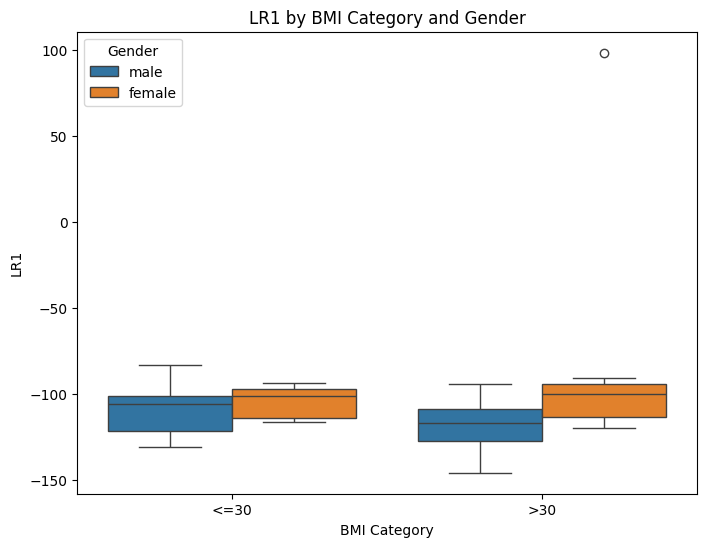

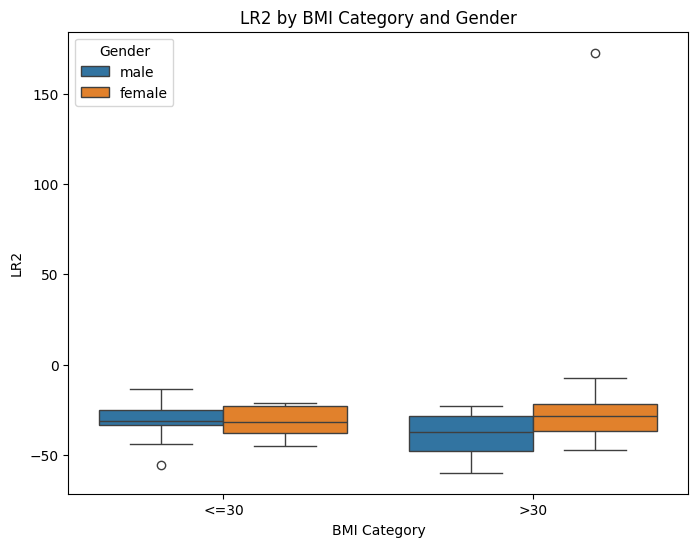

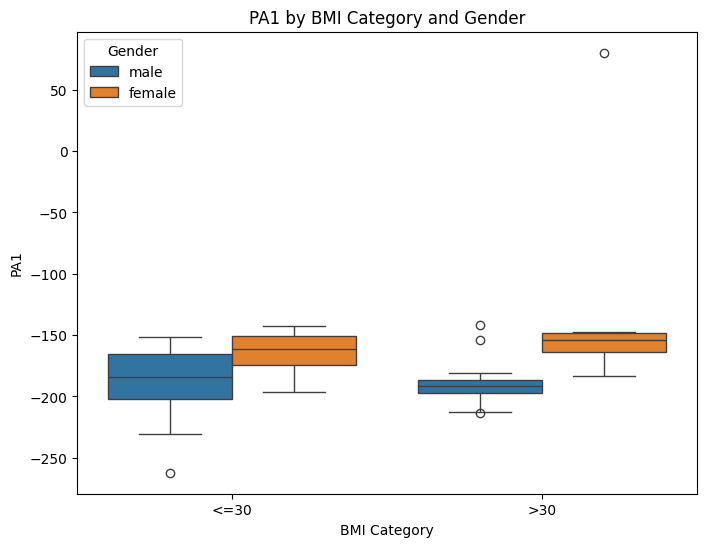

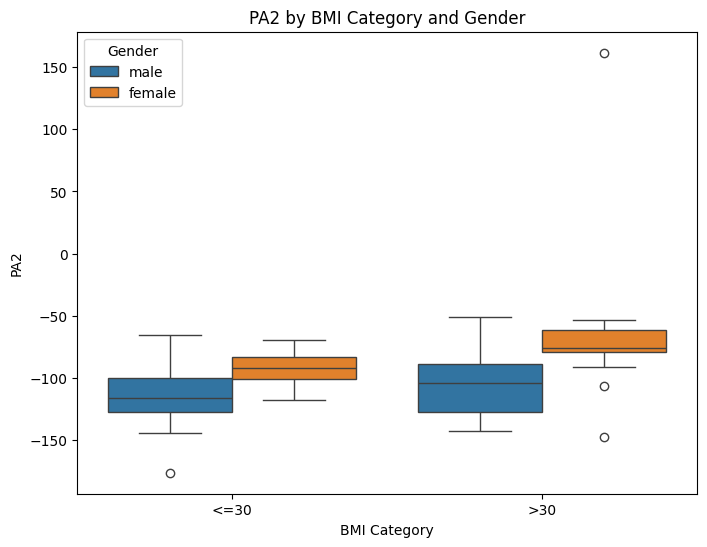

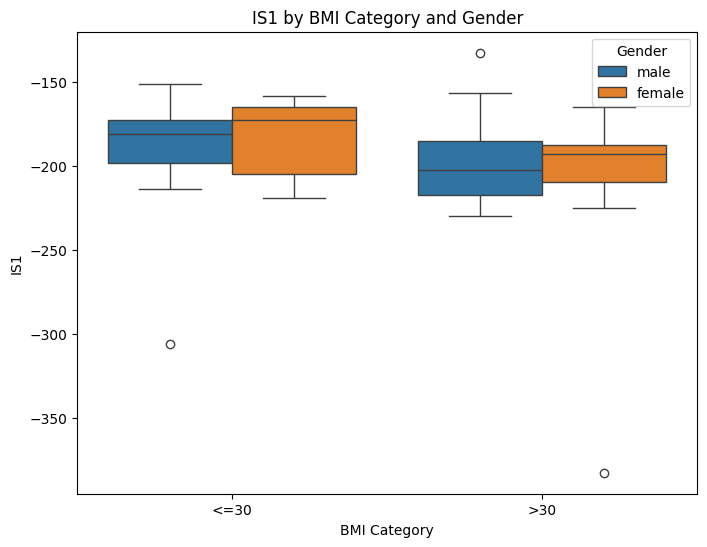

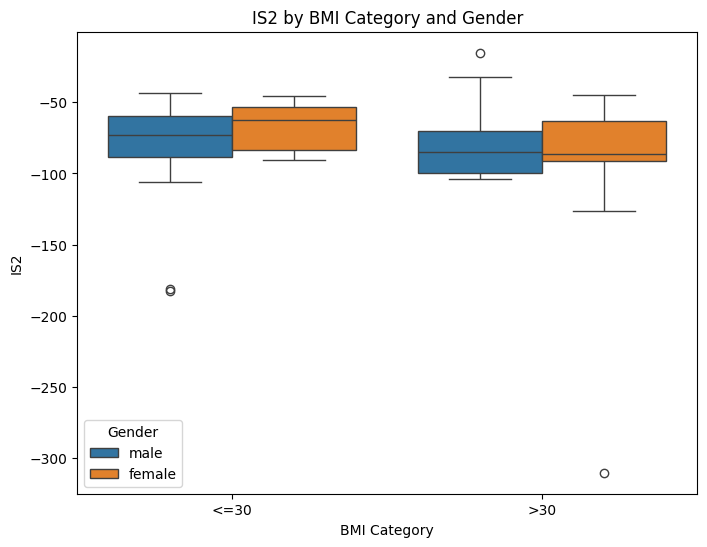

In [93]:
# Add BMI category column
df_processed['BMI_Category'] = df_processed['BMI'].apply(lambda x: '<=30' if x <= 30 else '>30')

# Plot boxplots for each variable
variables = ['LR1', 'LR2', 'PA1', 'PA2', 'IS1', 'IS2']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='BMI_Category', y=var, hue='Gender', data=df_processed)
    plt.title(f'{var} by BMI Category and Gender')
    plt.xlabel('BMI Category')
    plt.ylabel(var)
    plt.legend(title='Gender')
    plt.show()

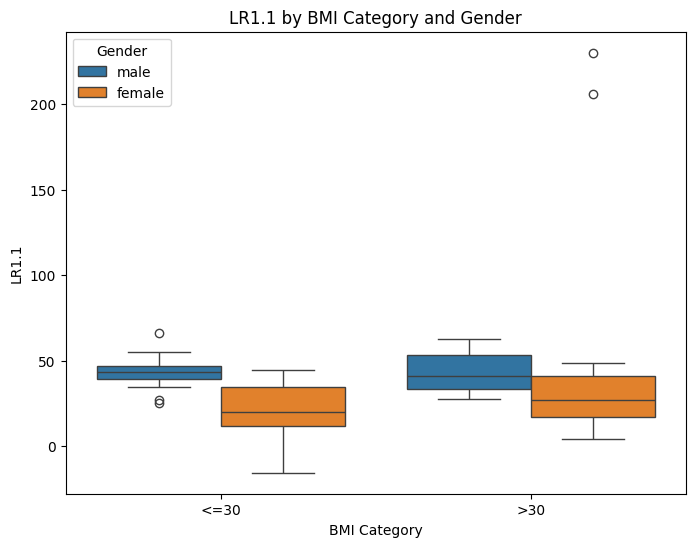

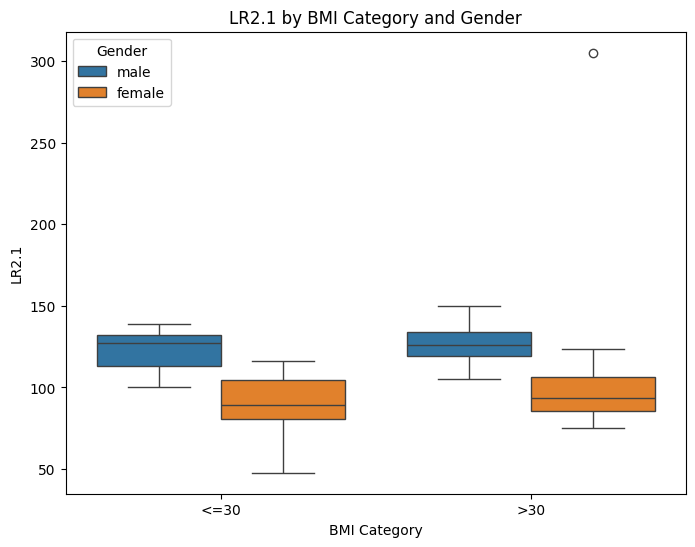

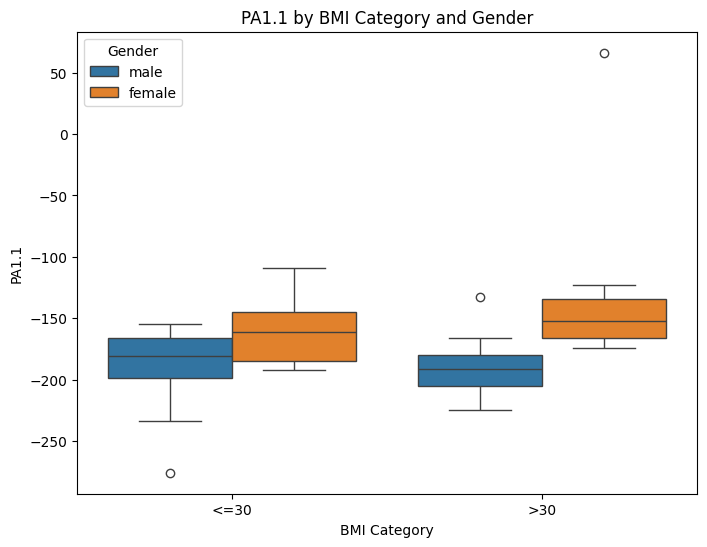

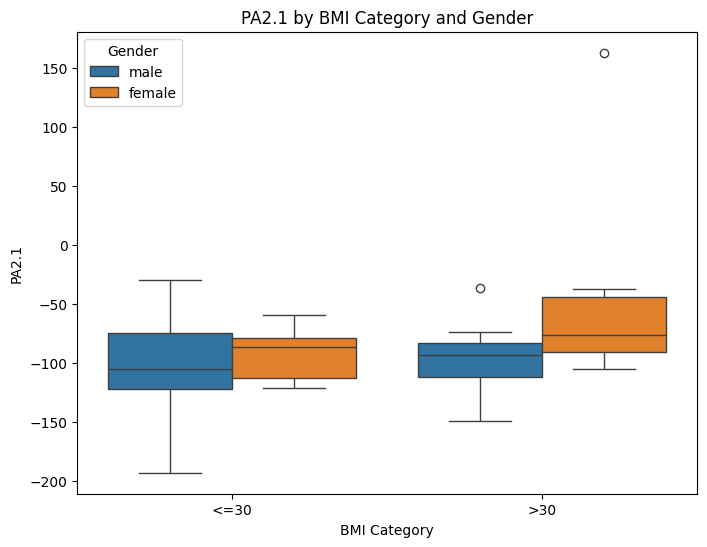

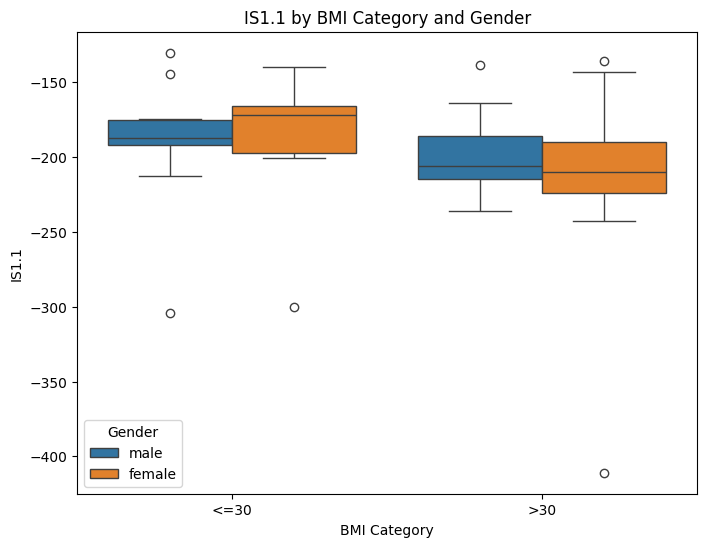

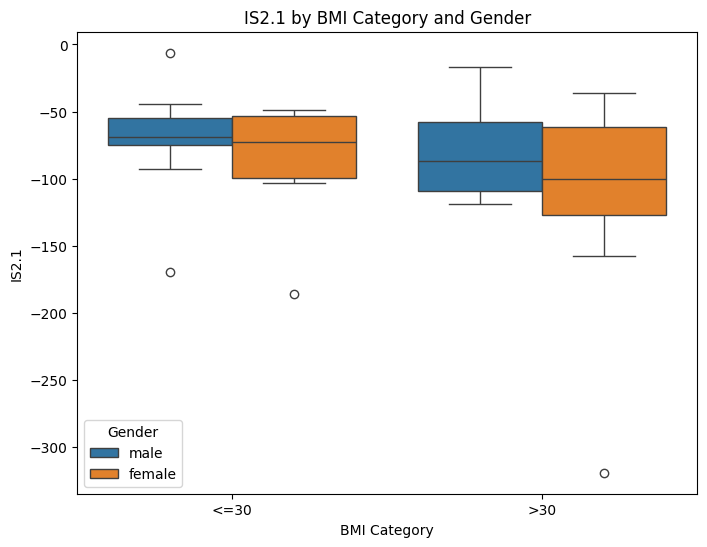

In [94]:
# Plot boxplots for each variable
variables = ['LR1.1', 'LR2.1', 'PA1.1', 'PA2.1', 'IS1.1', 'IS2.1']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='BMI_Category', y=var, hue='Gender', data=df_processed)
    plt.title(f'{var} by BMI Category and Gender')
    plt.xlabel('BMI Category')
    plt.ylabel(var)
    plt.legend(title='Gender')
    plt.show()